# Who is most affected by terrorists?

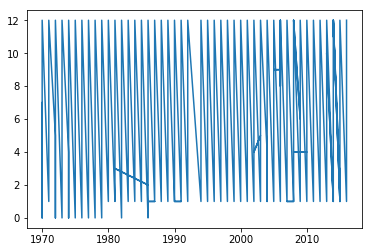

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)
x=df['iyear']
y=df['imonth']
plt.plot(x,y)
plt.show()